In [1]:
import os
import shutil
import warnings

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import torchaudio

warnings.filterwarnings(action="ignore")
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import json

import geopandas
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import soundfile
import tensorflow as tf
import tensorflow_addons as tfa
import torch

%matplotlib inline
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from torchaudio.transforms import MelSpectrogram
from tqdm import tqdm

from src.MEL_Gen_Aug import MEL_Gen, Mel_Provider
from src.prepare_dataset import (
    choose_ids,
    make_dict_birds,
    make_intervals,
    make_intervals_upsampling,
    prepare_dataset,
)

In [ ]:
SEED = 78
IMG_SIZE = 260
N_MELS = 260
SAMPLE_RATE = 32000
N_FFT = 2048
SIGNAL_LENGTH = 5
FREQ_MIN = 0
FREQ_MAX = 16000
WIN_LENGHT = 1024
BATCH_SIZE = 200

In [2]:
SEED = 78
IMG_SIZE = 260
SAMPLE_RATE = 32000
N_FFT = 2048
SIGNAL_LENGTH = 5
FREQ_MIN = 0
FREQ_MAX = 16000
WIN_LENGHT = 1024
BATCH_SIZE = 200
list_drop = [
    "XC509721.ogg",
    "XC428067.ogg",
    "XC523831.ogg",
    "XC523960.ogg",
    "XC237870.ogg",
    "XC129924.ogg",
    "XC576851.ogg",
    "XC579430.ogg",
    "XC590621.ogg",
]

In [3]:
bird_classes = [
    "acafly",
    "acowoo",
    "aldfly",
    "ameavo",
    "amecro",
    "amegfi",
    "amekes",
    "amered",
    "amerob",
    "amewig",
    "amtspa",
    "andsol1",
    "annhum",
    "astfly",
    "azaspi1",
    "babwar",
    "balori",
    "banana",
    "banwre1",
    "barant1",
    "barswa",
    "bawswa1",
    "bawwar",
    "baywre1",
    "bbwduc",
    "belkin1",
    "bewwre",
    "bkbwar",
    "bkcchi",
    "bkhgro",
    "bkmtou1",
    "bknsti",
    "blbgra1",
    "blbthr1",
    "blcjay1",
    "blsspa1",
    "blugrb1",
    "blujay",
    "bncfly",
    "bnhcow",
    "bobfly1",
    "brbmot1",
    "brcvir1",
    "brebla",
    "brncre",
    "brnjay",
    "brnthr",
    "brratt1",
    "brwhaw",
    "brwpar1",
    "btbwar",
    "btnwar",
    "btywar",
    "bucmot2",
    "buggna",
    "bugtan",
    "buhvir",
    "bulori",
    "burwar1",
    "bushti",
    "calqua",
    "caltow",
    "cangoo",
    "canwar",
    "carchi",
    "carwre",
    "casfin",
    "caster1",
    "casvir",
    "ccbfin",
    "cedwax",
    "chbant1",
    "chbchi",
    "chbwre1",
    "chcant2",
    "chispa",
    "chswar",
    "cinfly2",
    "clanut",
    "clcrob",
    "cliswa",
    "cobtan1",
    "colcha1",
    "coltro1",
    "comgra",
    "comloo",
    "commer",
    "compau",
    "compot1",
    "comrav",
    "comyel",
    "cotfly1",
    "cowscj1",
    "crfpar",
    "daejun",
    "dowwoo",
    "ducfly",
    "dusfly",
    "easblu",
    "easkin",
    "easmea",
    "easpho",
    "eastow",
    "eawpew",
    "eucdov",
    "eursta",
    "fepowl",
    "fiespa",
    "flrtan1",
    "foxspa",
    "gartro1",
    "gbbgul",
    "gbwwre1",
    "gcrwar",
    "gnttow",
    "gocfly1",
    "gockin",
    "gocspa",
    "goftyr1",
    "gohque1",
    "goowoo1",
    "grasal1",
    "grbani",
    "grbher3",
    "grcfly",
    "grekis",
    "grethr1",
    "gretin1",
    "greyel",
    "grhcha1",
    "grhowl",
    "grnher",
    "grnjay",
    "grtgra",
    "grycat",
    "gryhaw2",
    "haiwoo",
    "herthr",
    "herwar",
    "higmot1",
    "hofwoo1",
    "houfin",
    "houspa",
    "houwre",
    "hutvir",
    "incdov",
    "indbun",
    "kebtou1",
    "killde",
    "larspa",
    "laufal1",
    "laugul",
    "lazbun",
    "leafly",
    "leasan",
    "lesgol",
    "lesgre1",
    "lesvio1",
    "linspa",
    "linwoo1",
    "littin1",
    "lobgna5",
    "lotduc",
    "lotman1",
    "macwar",
    "magwar",
    "mallar3",
    "marwre",
    "meapar",
    "melbla1",
    "monoro1",
    "mouchi",
    "moudov",
    "mouela1",
    "mouqua",
    "mouwar",
    "naswar",
    "nocall",
    "norcar",
    "norfli",
    "normoc",
    "norpar",
    "norwat",
    "nrwswa",
    "nutwoo",
    "oaktit",
    "obnthr1",
    "ocbfly1",
    "olsfly",
    "orbspa1",
    "orcpar",
    "orcwar",
    "orfpar",
    "osprey",
    "ovenbi1",
    "pabspi1",
    "palwar",
    "pasfly",
    "pibgre",
    "pilwoo",
    "pinsis",
    "pirfly1",
    "plawre1",
    "plsvir",
    "prowar",
    "purfin",
    "purgal2",
    "putfru1",
    "pygnut",
    "rawwre1",
    "rebnut",
    "rebsap",
    "rebwoo",
    "reevir1",
    "rehbar1",
    "relpar",
    "reshaw",
    "rethaw",
    "rewbla",
    "ribgul",
    "rinkin1",
    "roahaw",
    "robgro",
    "royter1",
    "rtlhum",
    "rubpep1",
    "rubwre1",
    "ruckin",
    "rucspa1",
    "rucwar",
    "rucwar1",
    "rudpig",
    "rugdov",
    "rumfly1",
    "runwre1",
    "rutjac1",
    "saffin",
    "sancra",
    "sander",
    "savspa",
    "saypho",
    "scamac1",
    "scatan",
    "scbwre1",
    "scptyr1",
    "scrtan1",
    "semplo",
    "shicow",
    "smbani",
    "sobtyr1",
    "socfly1",
    "solsan",
    "sonspa",
    "soulap1",
    "sposan",
    "spotow",
    "spvear1",
    "stejay",
    "sthant1",
    "sthwoo1",
    "strcuc1",
    "strfly1",
    "strsal1",
    "stvhum2",
    "sumtan",
    "swaspa",
    "swathr",
    "tenwar",
    "thbeup1",
    "thswar1",
    "towsol",
    "treswa",
    "trogna1",
    "trokin",
    "tromoc",
    "tropar",
    "tuftit",
    "veery",
    "vigswa",
    "warvir",
    "wbwwre1",
    "wegspa1",
    "wesant1",
    "wesblu",
    "weskin",
    "wesmea",
    "westan",
    "wewpew",
    "whbman1",
    "whbnut",
    "whcpar",
    "whcspa",
    "whevir",
    "whfpar1",
    "whiwre1",
    "whtdov",
    "whtspa",
    "whwbec1",
    "whwdov",
    "wilfly",
    "wiltur",
    "wlswar",
    "wooduc",
    "woothr",
    "wrenti",
    "y00475",
    "yebcha",
    "yebela1",
    "yebfly",
    "yebori1",
    "yebsap",
    "yebsee1",
    "yefgra1",
    "yehbla",
    "yehcar1",
    "yelwar",
    "yerwar",
    "yeteup1",
    "yetvir",
]

In [4]:
bird_classes.sort()

In [5]:
dict_birds = {}
for i, bird in enumerate(bird_classes):
    dict_birds['bird']=i

In [6]:
# os.mkdir("/app/_data/models/Eff2_319cl_1/")

In [7]:
file_json = open("/app/_data/models/Eff2_319cl_1/dict_birds.json", "w")
json.dump(dict_birds, file_json)
file_json.close()

In [8]:
nocall = pd.read_csv("/app/_data/labels_nocall/all_nocalls.csv")

In [9]:
all_audio = pd.read_csv("/app/_data/all_audio_initial.csv")
all_audio = all_audio.query("filename not in @list_drop").reset_index(drop=True)
all_audio = all_audio.query("primary_label in @bird_classes").reset_index(drop=True)
all_audio = all_audio.query("year >=1980 and year<=2021").reset_index(drop=True)
all_audio.shape

(54507, 24)

# dict_birds and weights

In [10]:
all_audio = all_audio[all_audio["rating"] >= 3]

In [11]:
all_audio.shape

(46989, 24)

In [12]:
dict_birds, all_audio = make_dict_birds(all_audio, secondary=False)

In [13]:
len(dict_birds)

319

In [14]:
dict_weights = (1 / all_audio["primary_label"].value_counts()).to_dict()
all_audio["class_weights"] = all_audio["primary_label"].replace(dict_weights)
# all_audio["class_weights"] = all_audio["class_weights"] * all_audio["rating"]

In [15]:
short_audio = all_audio[all_audio["rating"] != 6].reset_index(
    drop=True
)  # only short audio
train_sondscapes = all_audio[all_audio["rating"] == 6].reset_index(
    drop=True
)  # only train_soundscapes
short_audio.shape
train_sondscapes.shape
train_sondscapes["duration"] = 600

(44589, 24)

(2400, 24)

## calls

In [16]:
short_audio_0_20 = short_audio[short_audio["duration"] < 19]
short_audio_20_30 = short_audio[
    (short_audio["duration"] >= 19) & (short_audio["duration"] <= 30)
]
short_audio_30 = short_audio[short_audio["duration"] > 30]

In [17]:
short_audio_20_30["duration"] = short_audio_20_30["duration"] - 4
short_audio_30["duration"] = short_audio_30["duration"] - 7

In [18]:
short_audio = pd.concat(
    [short_audio_0_20, short_audio_20_30, short_audio_30], axis=0, ignore_index=True
)

In [19]:
short_audio.shape

(44589, 24)

# Make intervals for short audio

In [20]:
array_for_cut = short_audio[["filename", "duration", "class_weights"]].values

birds_intervals = make_intervals(array_for_cut, 5, max_intervals=150, max_lenght=300)
birds_intervals = birds_intervals.sample(frac=1, random_state=SEED)
birds_intervals.shape

(1189957, 3)

In [21]:
birds_intervals["row_id"] = birds_intervals.index
birds_intervals["filename"].value_counts()

XC593553.ogg    150
XC132874.ogg    150
XC268213.ogg    150
XC504277.ogg    150
XC580960.ogg    150
               ... 
XC384642.ogg      4
XC301120.ogg      4
XC583545.ogg      4
XC29295.ogg       4
XC152846.ogg      4
Name: filename, Length: 44589, dtype: int64

In [22]:
dict_w = pd.DataFrame((1 / birds_intervals["filename"].value_counts()))
dict_w.columns = ["weights"]
dict_w["filename"] = dict_w.index

In [23]:
birds_intervals = birds_intervals.merge(dict_w, on="filename", how="left")

In [24]:
birds_intervals_sample = birds_intervals.sample(
    n=700000, weights="weights", random_state=SEED
)

In [25]:
birds_intervals_sample = birds_intervals_sample.sample(
    n=500000, weights="class_weights", random_state=SEED
)

In [26]:
birds_intervals_sample[birds_intervals_sample["filename"] == "XC196037.ogg"]

,end_sec,class_weights,filename,row_id,weights
268921,9.0,0.001818,XC196037.ogg,XC196037_9_0,0.1
520242,7.0,0.001818,XC196037.ogg,XC196037_7_0,0.1
733923,13.0,0.001818,XC196037.ogg,XC196037_13_0,0.1
1096588,6.0,0.001818,XC196037.ogg,XC196037_6_0,0.1
161291,10.0,0.001818,XC196037.ogg,XC196037_10_0,0.1


In [27]:
short_audio = birds_intervals_sample.merge(
    short_audio[
        [
            "filename",
            "primary_label",
            "secondary_labels",
            "label_id",
            "secondary_labels_id",
            "duration",
            "rating",
            "year",
            "file_path",
            "frames",
            "sin_month",
            "cos_month",
            "sin_longitude",
            "cos_longitude",
            "latitude",
            "norm_latitude",
            "date",
        ]
    ],
    on="filename",
    how="left",
)

short_audio["filename"].value_counts()

short_audio["end_sec"] = short_audio["end_sec"].apply(lambda x: x if x > 5 else 5)

short_audio["start_sec"] = short_audio["end_sec"] - 5

XC595751.ogg    40
XC504287.ogg    40
XC571073.ogg    39
XC601316.ogg    39
XC614268.ogg    38
                ..
XC129258.ogg     1
XC386603.ogg     1
XC524542.ogg     1
XC168094.ogg     1
XC134211.ogg     1
Name: filename, Length: 44552, dtype: int64

In [28]:
short_audio["primary_label"].value_counts()

bncfly     3384
normoc     3370
eursta     3259
amerob     3146
swathr     3124
           ... 
runwre1     125
crfpar      110
whcpar      103
stvhum2      57
wegspa1      49
Name: primary_label, Length: 318, dtype: int64

# train_sondscapes

In [29]:
train_sondscapes[train_sondscapes["primary_label"] != "nocall"]['duration']

240     600
242     600
244     600
267     600
268     600
       ... 
2391    600
2393    600
2394    600
2396    600
2397    600
Name: duration, Length: 871, dtype: int64

In [30]:
short_audio = pd.concat([short_audio, train_sondscapes], axis=0, ignore_index=True).sample(frac=1, random_state=SEED)

# nocall

In [31]:
nocall = nocall.drop_duplicates()

nocall["file_path"] = nocall["file_path"].str.replace("birdclef-2021/", "")

nocall = nocall[~nocall["file_path"].str.contains("train_soundscapes")].reset_index(
    drop=True
)

soundscapes_nocall = all_audio[all_audio["file_path"].str.contains("train_soundscapes")]
soundscapes_nocall = soundscapes_nocall[soundscapes_nocall["primary_label"] == "nocall"]

dict_w = (1 / nocall["filename"].value_counts()).to_dict()
nocall["weights"] = nocall["filename"].replace(dict_w)

nocall_sample = nocall.sample(1200, random_state=SEED, weights="weights")

nocall_sample["filename"].value_counts()

XC117324.ogg    15
XC317112.ogg    14
XC293291.ogg    14
XC542240.ogg    12
XC351965.ogg    12
                ..
XC144370.ogg     1
XC132192.ogg     1
XC291092.ogg     1
XC259210.ogg     1
XC210768.ogg     1
Name: filename, Length: 192, dtype: int64

In [32]:
nocall_sample = nocall_sample.merge(
    all_audio[
        [
            "filename",
            "rating",
            "year",
            "sin_month",
            "cos_month",
            "sin_longitude",
            "cos_longitude",
            "latitude",
            "norm_latitude",
            "class_weights",
        ]
    ],
    on="filename",
    how="left",
)

nocall_sample = nocall_sample[
    [
        "filename",
        "row_id",
        "start_sec",
        "end_sec",
        "file_path",
        "duration",
        "rating",
        "year",
        "sin_month",
        "cos_month",
        "sin_longitude",
        "cos_longitude",
        "latitude",
        "norm_latitude",
        "class_weights",
    ]
]
soundscapes_nocall = soundscapes_nocall[
    [
        "filename",
        "row_id",
        "start_sec",
        "end_sec",
        "file_path",
        "duration",
        "rating",
        "year",
        "sin_month",
        "cos_month",
        "sin_longitude",
        "cos_longitude",
        "latitude",
        "norm_latitude",
        "class_weights",
    ]
]

soundscapes_nocall["duration"] = 600

all_nocall = pd.concat([nocall_sample, soundscapes_nocall], axis=0, ignore_index=True)

all_nocall["label_id"] = dict_birds["nocall"]
all_nocall = all_nocall.sample(frac=1, random_state=SEED).reset_index(drop=True)

all_nocall.isna().sum()
all_nocall = all_nocall.dropna(axis=0)
all_nocall["secondary_labels_id"] = np.nan
all_nocall["year"].describe()

filename           0
row_id             0
start_sec          0
end_sec            0
file_path          0
duration           0
rating           207
year             207
sin_month        207
cos_month        207
sin_longitude    207
cos_longitude    207
latitude         207
norm_latitude    207
class_weights    207
label_id           0
dtype: int64

count    2522.000000
mean     2016.124504
std         4.625220
min      1989.000000
25%      2016.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: year, dtype: float64

# concat

In [33]:
final_audio = (
    pd.concat(
        [short_audio, all_nocall],
        axis=0,
        ignore_index=True,
    )
    .sample(frac=1, random_state=SEED)
    .reset_index(drop=True)
)
final_audio.shape

(504922, 25)

In [34]:
final_audio["primary_label"].value_counts().tail(10)

scrtan1    381
rehbar1    373
flrtan1    277
grhcha1    251
hofwoo1    186
runwre1    131
crfpar     128
whcpar     107
stvhum2     57
wegspa1     49
Name: primary_label, dtype: int64

#  upsampling


In [35]:
rare_birds = list(final_audio["primary_label"].value_counts().tail(10).index.values)

In [36]:
df = pd.DataFrame(columns=["end_sec", "class_weights", "filename"])
for bird in rare_birds:
    rare_bird_filenames = (
        all_audio.query("primary_label ==@bird")["filename"].unique().tolist()
    )
    rare_array = all_audio.query(
        "primary_label ==@bird and rating!=0 and rating!=6 and filename in @rare_bird_filenames"
    )[["filename", "duration", "class_weights"]].values
    intervals = make_intervals_upsampling(rare_array, sum_intervals=600)
    df = pd.concat([df, intervals], axis=0)

df

,end_sec,class_weights,filename
XC129839_5_0,5.00,0.037037,XC129839.ogg
XC129839_6_71,6.71,0.037037,XC129839.ogg
XC129839_8_43,8.43,0.037037,XC129839.ogg
XC129839_10_16,10.16,0.037037,XC129839.ogg
XC129839_11_87,11.87,0.037037,XC129839.ogg
...,...,...,...
XC433788_36_45,36.45,0.200000,XC433788.ogg
XC433788_36_58,36.58,0.200000,XC433788.ogg
XC433788_36_71,36.71,0.200000,XC433788.ogg
XC433788_36_84,36.84,0.200000,XC433788.ogg


In [37]:
df["filename"].unique().shape

(144,)

In [38]:
df["row_id"] = df.index
df = df.merge(
    all_audio[
        [
            "filename",
            "primary_label",
            "secondary_labels",
            "label_id",
            "secondary_labels_id",
            "duration",
            "rating",
            "year",
            "file_path",
            "frames",
            "sin_month",
            "cos_month",
            "sin_longitude",
            "cos_longitude",
            "latitude",
            "norm_latitude",
            "date",
        ]
    ],
    on="filename",
    how="left",
)
df["end_sec"] = df["end_sec"].apply(lambda x: x if x > 5 else 5)
df["start_sec"] = df["end_sec"] - 5

In [39]:
df["primary_label"].unique().shape

(10,)

In [40]:
final_audio = (
    pd.concat(
        [final_audio, df],
        axis=0,
        ignore_index=True,
    )
    .sample(frac=1, random_state=SEED)
    .reset_index(drop=True)
)
final_audio.shape

final_audio["primary_label"].value_counts().tail(20)

(511344, 25)

stvhum2    684
yebsap     680
gretin1    663
sander     652
rugdov     648
nutwoo     630
palwar     609
sthwoo1    603
leasan     603
grnher     597
yeteup1    587
ameavo     544
orfpar     543
wooduc     536
brwpar1    499
higmot1    460
bucmot2    418
nrwswa     403
rebsap     401
amewig     384
Name: primary_label, dtype: int64

In [41]:
final_audio['secondary_labels_id'] = final_audio['secondary_labels_id'].replace('',np.nan)

In [42]:
final_audio['secondary_labels_id'].unique()

array([nan, '140', '180 90 172 255 155', ..., '17 231 0',
       '169 133 250 170 1', '178 316 84 252'], dtype=object)

In [43]:
final_audio['row_id'].unique().shape

(509583,)

In [44]:
train, valid = train_test_split(final_audio, train_size=0.8, random_state=SEED)
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

# MEL_Gen

In [45]:
NUM_CLASSES = len(dict_birds)
BATCH_SIZE = 200

In [46]:
mel_pr = Mel_Provider(
    n_fft=N_FFT,
    win_length=WIN_LENGHT,
    n_mels=IMG_SIZE,
    sample_rate=SAMPLE_RATE,
    mel_image_size=IMG_SIZE,
    min_frequency=FREQ_MIN,
    max_frequency=FREQ_MAX,
    signal_lenght=SIGNAL_LENGTH,
)

In [47]:
# wave = np.load("/app/_data/npy/waves_npy/XC570659.npy")

In [48]:
# shutil.rmtree('/app/_data/npy/short_mels_260_uint8/', ignore_errors=True)
# os.mkdir('/app/_data/npy/short_mels_260_uint8')

In [49]:
gen_train = MEL_Gen(
    df=train,
    n_mels=IMG_SIZE,
    seed=SEED,
    sample_rate=SAMPLE_RATE,
    mel_image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    n_classes=NUM_CLASSES,
    signal_lenght=SIGNAL_LENGTH,
    mel_provider=mel_pr,
    nocall_label_id=dict_birds["nocall"],
    wave_dir="/app/_data/npy/waves_npy/",
    short_mel_dir="/app/_data/npy/mels_260_uint8_1d/",
    convert_to_rgb=True,
    shuffle=True,
    return_primary_labels=False,
    return_concat_labels=True,
    augment=True,
    img_dtype="uint8",
    secondary_coeff=0.3,
)
gen_valid = MEL_Gen(
    df=valid,
    n_mels=IMG_SIZE,
    seed=SEED,
    nocall_label_id=dict_birds["nocall"],
    sample_rate=SAMPLE_RATE,
    mel_image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    n_classes=NUM_CLASSES,
    signal_lenght=SIGNAL_LENGTH,
    mel_provider=mel_pr,
    wave_dir="/app/_data/npy/waves_npy/",
    short_mel_dir="/app/_data/npy/mels_260_uint8_1d/",
    convert_to_rgb=True,
    shuffle=False,
    return_primary_labels=False,
    return_concat_labels=True,
    augment=False,
    img_dtype="uint8",
    secondary_coeff=0.3,
)

In [50]:
a = gen_train.__getitem__(2)

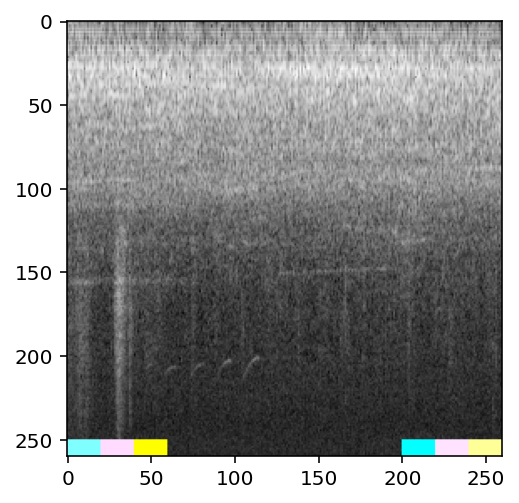

In [51]:
plt.imshow(a[0][67])

In [52]:
# plt.figure(figsize=(20,15))
# for i in range(16):
#     a = gen_train.__getitem__(2)
#     plt.subplot(4,4,i+1)
#     plt.imshow(a[0][67])
# plt.show();

# model

In [53]:
def get_model():
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model = keras.applications.EfficientNetB2(
        weights="imagenet", include_top=False
    )
    x = base_model(inputs)
    x = keras.layers.GlobalAveragePooling2D(name="avg_pool")(x)
    x = keras.layers.Flatten(name="flatten")(x)
    outputs = keras.layers.Dense(NUM_CLASSES, activation="sigmoid")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(lr=0.0005),
        metrics=[
            "acc",
            keras.metrics.Recall(),
            keras.metrics.Precision(),
            tfa.metrics.F1Score(num_classes=NUM_CLASSES, average="micro"),
        ],
    )
    return model


policy = keras.mixed_precision.experimental.Policy("mixed_float16")
keras.mixed_precision.experimental.set_policy(policy)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3090, compute capability 8.6


In [54]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=12,
        restore_best_weights=True,
        verbose=1,
        mode="min",
    ),
    keras.callbacks.ModelCheckpoint(
        "/app/_data/models/Eff2_319cl_1/Eff2_319_1.h5",
        monitor="val_loss",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="min",
        save_freq="epoch",
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.9,
        patience=5,
        verbose=1,
        mode="min",
        min_delta=1e-4,
        min_lr=0.00000001,
    ),
    keras.callbacks.TensorBoard(log_dir="/app/.tensorboard/Eff2_319cl_1/", histogram_freq=0),
    keras.callbacks.experimental.BackupAndRestore("/app/_data/models/Eff2_319cl_1/backup/"),
    keras.callbacks.TerminateOnNaN(),
]

In [ ]:
model = get_model()
history = model.fit(
    gen_train,
    validation_data=gen_valid,
    epochs=100,
    steps_per_epoch=train.shape[0] // BATCH_SIZE,
    validation_steps=valid.shape[0] // BATCH_SIZE,
    verbose=1,
    workers=20,
    max_queue_size=50,
    callbacks=callbacks,
)

Epoch 29/100
   1/2045 [..............................] - ETA: 0s - loss: 0.0033 - acc: 0.9650 - recall: 0.5603 - precision: 0.9721 - f1_score: 0.8555WARNING:tensorflow:From /usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
 195/2045 [=>............................] - ETA: 35:02 - loss: 0.0032 - acc: 0.9534 - recall: 0.5681 - precision: 0.9771 - f1_score: 0.8531

In [63]:
# shutil.rmtree('/app/_data/npy/mels_260_uint8_1d')
# os.mkdir('/app/_data/npy/mels_260_uint8_1d')

In [58]:
# for i in range(10000):
#     j = np.random.randint(0, 300)
#     a = np.load('/app/_data/npy/mels_260_uint8_1d/'+os.listdir('/app/_data/npy/mels_260_uint8_1d/')[i])

KeyboardInterrupt: 

In [61]:
len(os.listdir('/app/_data/npy/mels_260_uint8_1d'))

771084